<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2020-11-30 18:49:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  31.7MB/s    in 1.1s    

2020-11-30 18:49:46 (31.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
query2 = """
SELECT * FROM LanguageDesireNextYear
"""
df2 = pd.read_sql_query(query2, conn)

In [7]:
query3 = """
select * from LanguageWorkedWith
"""
dfquiz = pd.read_sql_query(query3,conn)
quiz2 = dfquiz.groupby('LanguageWorkedWith').count()
quiz2

,Respondent
LanguageWorkedWith,
Assembly,437
Bash/Shell/PowerShell,4642
C,1578
C#,4288
C++,1946
Clojure,164
Dart,237
Elixir,187
Erlang,98


In [8]:
query4 = """
select * from LanguageWorkedWith l
left join DatabaseWorkedWith d on l.Respondent = d.Respondent
where l.LanguageWorkedWith = 'SQL' and d.DatabaseWorkedWith = 'MySQL'
"""
dfquiz2 = pd.read_sql_query(query4,conn)
dfquiz2.describe()
# quiz3 = dfquiz2.groupby('LanguageWorkedWith').count()
# quiz3

,Respondent,Respondent
count,3904.000000,3904.000000
mean,12622.035348,12622.035348
std,7201.906975,7201.906975
min,4.000000,4.000000
25%,6539.500000,6539.500000
50%,12658.000000,12658.000000
75%,18860.250000,18860.250000
max,25137.000000,25137.000000


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [11]:
# your code goes here
QUERY = """
SELECT * FROM master
--LIMIT 10
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


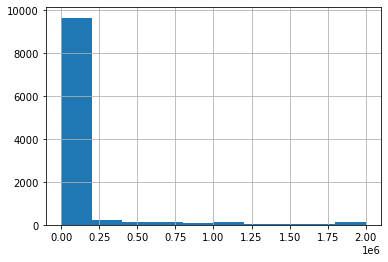

In [12]:
df['ConvertedComp'].hist()

### Box Plots


Plot a box plot of `Age.`


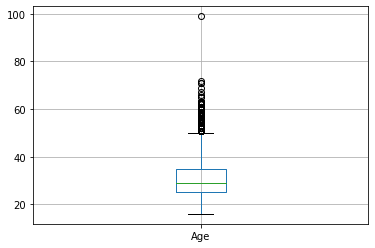

In [13]:
# your code goes here
df.boxplot(column='Age')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


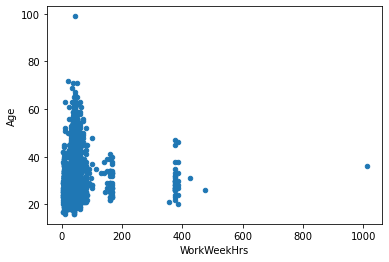

In [14]:
# your code goes here
df.plot.scatter(x='WorkWeekHrs', y='Age')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0.5, 1.0, 'Bubble Plot')

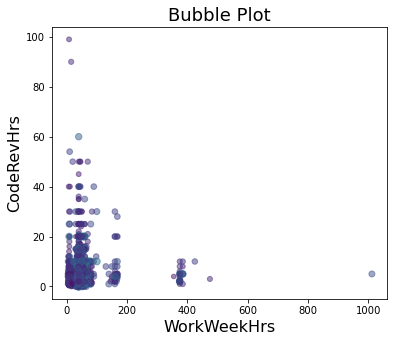

In [15]:
# your code goes here
import matplotlib.pyplot as plt
# scatter plot with scatter() function
# bubble size with "s"
# df dataframe contain columns X, Y, Z variables values
plt.figure(figsize=(6,5))
plt.scatter('WorkWeekHrs', 'CodeRevHrs', c='Age', s='Age', alpha=0.5, data=df)
plt.xlabel("WorkWeekHrs", size=16)
plt.ylabel("CodeRevHrs", size=16)
plt.title("Bubble Plot", size=18)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [16]:
# your code goes here
top5 = df2['LanguageDesireNextYear'].value_counts().head()
# print(type(top5))  # Have to convert from Series to DataFrame:
top5 = pd.DataFrame([top5])
top5 = top5.transpose()
top5['Percentage'] = top5['LanguageDesireNextYear']/top5['LanguageDesireNextYear'].sum()
top5.head()

,LanguageDesireNextYear,Percentage
JavaScript,6630,0.252120
HTML/CSS,5328,0.202609
Python,5239,0.199224
SQL,5012,0.190592
TypeScript,4088,0.155455


<Figure size 432x360 with 0 Axes>

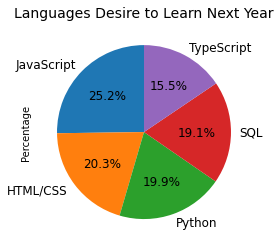

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
top5.plot(kind='pie', y = 'Percentage', autopct='%1.1f%%', startangle=90, shadow=False, labels=top5.index, legend = False, fontsize=12)
plt.title('Languages Desire to Learn Next Year', fontsize=14)
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [18]:
# your code goes here
sdf = df[['CodeRevHrs', 'WorkWeekHrs', 'Age']]
sdf = sdf[((sdf['Age'] >= 30) & (sdf['Age'] <= 35))]
sdf.describe()

,CodeRevHrs,WorkWeekHrs,Age
count,2379.000000,2917.000000,2942.000000
mean,4.784443,42.909479,32.210401
std,4.135441,24.753388,1.710495
min,0.000000,4.000000,30.000000
25%,2.000000,40.000000,31.000000
50%,4.000000,40.000000,32.000000
75%,5.000000,42.000000,34.000000
max,54.000000,425.000000,35.000000


In [19]:
sdf.head()

,CodeRevHrs,WorkWeekHrs,Age
5,3.0,8.0,31.0
11,2.0,40.0,34.0
12,2.0,40.0,32.0
18,15.0,42.0,34.0
22,2.0,40.0,33.0


In [20]:
sdf2 = sdf.groupby('Age').mean()
sdf2

,CodeRevHrs,WorkWeekHrs
Age,,
30.0,4.696858,43.131579
31.0,4.701923,41.602746
32.0,5.008557,42.650207
33.0,4.724311,44.486952
34.0,4.869902,43.147583
35.0,4.745130,42.451550


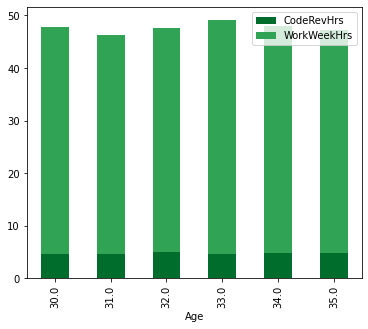

In [21]:
colors = ["#006D2C", "#31A354","#74C476"]
sdf2.plot.bar(stacked=True, color=colors, figsize=(6,5))

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


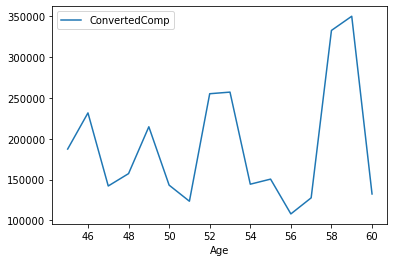

In [22]:
# your code goes here
df3 = df[['Age', 'ConvertedComp']]
df3 = df3[((df3['Age'] >= 45) & (df3['Age'] <= 60))]
df3 = df3.groupby('Age').mean()
df3.plot.line()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


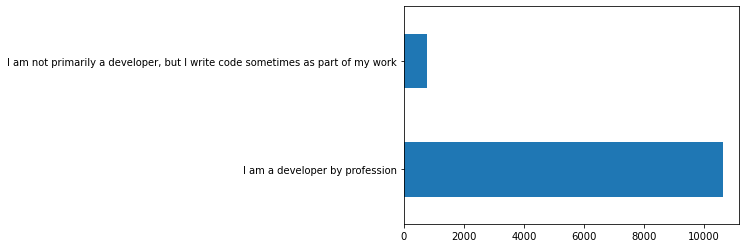

In [23]:
# your code goes here
barchart = df['MainBranch'].value_counts()
barchart.plot.barh()

In [33]:
query5 = """
select * from LanguageWorkedWith l
left join DatabaseWorkedWith d on l.Respondent = d.Respondent
"""
dfquiz3 = pd.read_sql_query(query5,conn)
dfquiz3.head()

,Respondent,LanguageWorkedWith,Respondent,DatabaseWorkedWith
0,4,C,4.0,MySQL
1,4,C,4.0,SQLite
2,4,C++,4.0,MySQL
3,4,C++,4.0,SQLite
4,4,C#,4.0,MySQL


In [34]:
top5_1 = dfquiz3['LanguageWorkedWith'].value_counts().head()
# print(type(top5))  # Have to convert from Series to DataFrame:
top5_1 = pd.DataFrame([top5_1])
top5_1 = top5_1.transpose()
top5_1['Percentage'] = top5_1['LanguageWorkedWith']/top5_1['LanguageWorkedWith'].sum()
top5_1.head()

# LanguageDesireNextYear

,LanguageWorkedWith,Percentage
JavaScript,25515,0.256943
HTML/CSS,23122,0.232845
SQL,21745,0.218978
Bash/Shell/PowerShell,14473,0.145747
Python,14447,0.145485


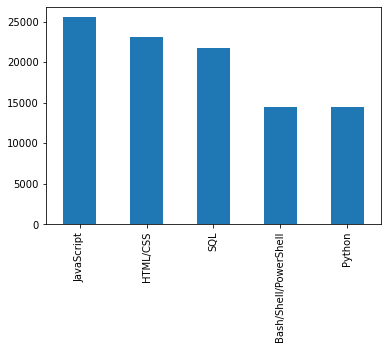

In [37]:
top5_1['LanguageWorkedWith'].plot(kind='bar')

In [46]:
query6 = """
select * from LanguageDesireNextYear l
left join DatabaseWorkedWith d on l.Respondent = d.Respondent
left join DatabaseDesireNextYear df on l.Respondent = df.Respondent
"""
dfquiz4 = pd.read_sql_query(query6,conn)
dfquiz4.head()

,Respondent,LanguageDesireNextYear,Respondent,DatabaseWorkedWith,Respondent,DatabaseDesireNextYear
0,4,C,4.0,MySQL,4.0,MySQL
1,4,C,4.0,MySQL,4.0,SQLite
2,4,C,4.0,SQLite,4.0,MySQL
3,4,C,4.0,SQLite,4.0,SQLite
4,4,C#,4.0,MySQL,4.0,MySQL


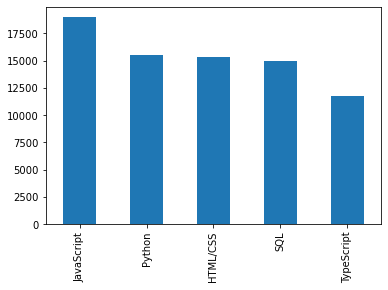

In [40]:
top5_2 = dfquiz4['LanguageDesireNextYear'].value_counts().head()
# print(type(top5))  # Have to convert from Series to DataFrame:
top5_2 = pd.DataFrame([top5_2])
top5_2 = top5_2.transpose()
top5_2['Percentage'] = top5_2['LanguageDesireNextYear']/top5_2['LanguageDesireNextYear'].sum()
# top5_2.head()

top5_2['LanguageDesireNextYear'].plot(kind='bar')
# LanguageWorkedWith

In [42]:
top5_db = dfquiz3['DatabaseWorkedWith'].value_counts().head()
# print(type(top5))  # Have to convert from Series to DataFrame:
top5_db = pd.DataFrame([top5_db])
top5_db = top5_db.transpose()
top5_db['Percentage'] = top5_db['DatabaseWorkedWith']/top5_db['DatabaseWorkedWith'].sum()
top5_db.head()

# LanguageDesireNextYear

,DatabaseWorkedWith,Percentage
MySQL,31868,0.274232
PostgreSQL,23866,0.205373
Microsoft SQL Server,23176,0.199435
SQLite,19920,0.171417
MongoDB,17378,0.149542


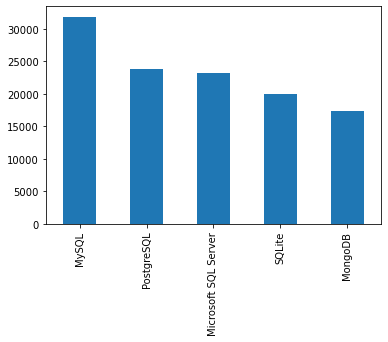

In [43]:
top5_db['DatabaseWorkedWith'].plot(kind='bar')

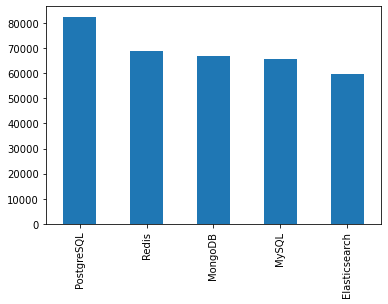

In [52]:
top5_dbf = dfquiz4['DatabaseDesireNextYear'].value_counts().head()
top5_dbf = pd.DataFrame([top5_dbf])
top5_dbf = top5_dbf.transpose()
top5_dbf['Percentage'] = top5_dbf['DatabaseDesireNextYear']/top5_dbf['DatabaseDesireNextYear'].sum()
top5_dbf['DatabaseDesireNextYear'].plot(kind='bar')

In [53]:
print(dfquiz3['DatabaseWorkedWith'].value_counts().head(10))

MySQL                   31868
PostgreSQL              23866
Microsoft SQL Server    23176
SQLite                  19920
MongoDB                 17378
Redis                   14540
Elasticsearch           11436
MariaDB                 10841
Oracle                  10325
Firebase                 7869
Name: DatabaseWorkedWith, dtype: int64


In [57]:
query_apx = """
select * from master m
left join LanguageWorkedWith l on l.Respondent = m.Respondent
"""
dfapx = pd.read_sql_query(query_apx,conn)
dfapx[['LanguageWorkedWith', 'ConvertedComp']].head()

,LanguageWorkedWith,ConvertedComp
0,C,61000.0
1,C#,61000.0
2,C++,61000.0
3,Python,61000.0
4,SQL,61000.0


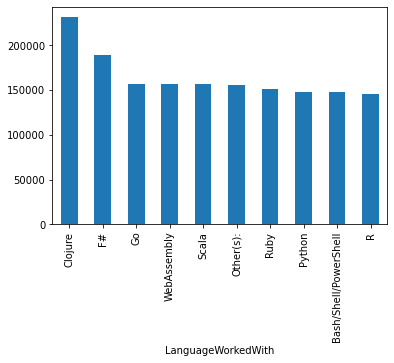

In [67]:
dfsal = dfapx.groupby('LanguageWorkedWith')['ConvertedComp'].mean()
# dfsal.sort_values(by='ConvertedComp', ascending=False, na_position='first', inplace=True)
df_topsal = dfsal.sort_values(ascending=False).head(10)
df_topsal.plot(kind='bar')

Close the database connection.


In [24]:
# conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
